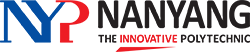

# IT2311 Assignment - Task 2: Sentiment Classification

You are required to build a sentiment classification model predict the sentiment of the review text. Businesses will be able to use this model to predict the sentiment of a new review.

Complete the following sub-tasks:
1. **Load Data**: Load the clean dataset
2. **Data Preparation**: Prepares the text representation for this task
3. **Modelling**: Perform sentiment classification using different text representation and modelling techniques
4. **Evaluation**: Evaluates results from the algorithms and select the best model

For each sub-task, perform the necessary steps and **explain the rationale taken for each step in this Jupyter notebook**. 

**Done by: \<Enter your name and admin number here\>**

## Import libraries and download the packages

In [3]:
#pip install datasets

In [4]:
import datasets as ds 
import pandas as pd
import nltk

## Load Data

In [5]:
#retrieve from hugging face
dataset=ds.load_dataset("McAuley-Lab/Amazon-Reviews-2023","raw_review_Digital_Music",trust_remote_code=True)
print(dataset["full"][0])

{'rating': 5.0, 'title': 'Nice', 'text': 'If i had a dollar for how many times I have played this cd and how many times I have asked Alexa to play it, I would be rich. Love this singer along with the Black Pumas. Finding a lot of new music that I like a lot on amazon. Try new things.', 'images': [], 'asin': 'B004RQ2IRG', 'parent_asin': 'B004RQ2IRG', 'user_id': 'AFUOYIZBU3MTBOLYKOJE5Z35MBDA', 'timestamp': 1618972613292, 'helpful_vote': 0, 'verified_purchase': True}


In [6]:
#save copy to local to load offline 
dataset.save_to_disk("SA_DM_dataset")

Saving the dataset (0/1 shards):   0%|          | 0/130434 [00:00<?, ? examples/s]

In [7]:
#load dataset
data=ds.load_from_disk("SA_DM_dataset")
print(data['full'][0])

{'rating': 5.0, 'title': 'Nice', 'text': 'If i had a dollar for how many times I have played this cd and how many times I have asked Alexa to play it, I would be rich. Love this singer along with the Black Pumas. Finding a lot of new music that I like a lot on amazon. Try new things.', 'images': [], 'asin': 'B004RQ2IRG', 'parent_asin': 'B004RQ2IRG', 'user_id': 'AFUOYIZBU3MTBOLYKOJE5Z35MBDA', 'timestamp': 1618972613292, 'helpful_vote': 0, 'verified_purchase': True}


In [8]:
#load from jsonl.gz
d1=pd.read_json("Digital_Music.jsonl.gz", lines=True)
d1.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Nice,If i had a dollar for how many times I have pl...,[],B004RQ2IRG,B004RQ2IRG,AFUOYIZBU3MTBOLYKOJE5Z35MBDA,2021-04-21 02:36:53.292,0,True
1,5,Excellent,awesome sound - cant wait to see them in perso...,[],B0026UZEI0,B0026UZEI0,AHGAOIZVODNHYMNCBV4DECZH42UQ,2011-06-15 19:52:05.000,0,True
2,5,Great service,This is a great cd. Good music and plays well....,[],B0055JSYHC,B0055JSYHC,AFGEM6BXCYHUILEOA3P2ZYBEF2TA,2021-03-15 20:06:33.006,0,True
3,1,No good,"These are not real German singers, they have a...",[],B000F9SMUQ,B000F9SMUQ,AH3OG6QD6EDJGZRVCFKV4B66VWNQ,2014-07-13 02:49:01.000,0,True
4,3,"Cool concept, so-so execution...",I first heard this playing in a Nagoya shop an...,[],B0049D1WVK,B0049D1WVK,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,2011-06-25 19:19:55.000,0,False


In [9]:
#require only necessary 

## Data Preparation
Perform the necessary steps and explain the rationale taken here.



In [10]:
import numpy as np

In [11]:
#get necessary columns: text and rating
data=d1[['text','rating']]
data.head()

,text,rating
0,If i had a dollar for how many times I have pl...,5
1,awesome sound - cant wait to see them in perso...,5
2,This is a great cd. Good music and plays well....,5
3,"These are not real German singers, they have a...",1
4,I first heard this playing in a Nagoya shop an...,3


In [12]:
#understand data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130434 entries, 0 to 130433
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    130434 non-null  object
 1   rating  130434 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [13]:
#convert rating to string
data['rating']=data['rating'].astype(str)

/var/folders/53/1_08_22s37n3r4dm51m_8m7c0000gn/T/ipykernel_9257/3144702325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating']=data['rating'].astype(str)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130434 entries, 0 to 130433
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    130434 non-null  object
 1   rating  130434 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [15]:
data.head(5)

,text,rating
0,If i had a dollar for how many times I have pl...,5
1,awesome sound - cant wait to see them in perso...,5
2,This is a great cd. Good music and plays well....,5
3,"These are not real German singers, they have a...",1
4,I first heard this playing in a Nagoya shop an...,3


In [16]:
data['rating']=data['rating'].replace({'1': 'negative','2':'negative', '3':np.NaN, '4':'positive','5':'positive'})

/var/folders/53/1_08_22s37n3r4dm51m_8m7c0000gn/T/ipykernel_9257/2576620970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating']=data['rating'].replace({'1': 'negative','2':'negative', '3':np.NaN, '4':'positive','5':'positive'})


In [17]:
data.head()

,text,rating
0,If i had a dollar for how many times I have pl...,positive
1,awesome sound - cant wait to see them in perso...,positive
2,This is a great cd. Good music and plays well....,positive
3,"These are not real German singers, they have a...",negative
4,I first heard this playing in a Nagoya shop an...,NaN


In [18]:
#examine null values
data.isna().sum()

text         0
rating    6392
dtype: int64

In [19]:
#examine duplicate values
data.duplicated().sum()

11666

In [20]:
#remove both null and duplicated values
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

/var/folders/53/1_08_22s37n3r4dm51m_8m7c0000gn/T/ipykernel_9257/569541139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
/var/folders/53/1_08_22s37n3r4dm51m_8m7c0000gn/T/ipykernel_9257/569541139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112556 entries, 0 to 130433
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    112556 non-null  object
 1   rating  112556 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [22]:
data.head()

,text,rating
0,If i had a dollar for how many times I have pl...,positive
1,awesome sound - cant wait to see them in perso...,positive
2,This is a great cd. Good music and plays well....,positive
3,"These are not real German singers, they have a...",negative
5,"I just saw ""Star Wars: L'attaque des clones"" l...",positive


## Modelling
Perform the necessary steps and explain the rationale taken here.



In [ ]:
#observing the distribution


In [23]:
# with text and modelling, can do 1st model 

In [24]:
from sklearn.model_selection import train_test_split

X=data['text']
Y=data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
#count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,2), max_features=7000)
X_train_cv=cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test)
#print dimensions and features 
print(f"""
train: {X_train_cv.toarray().shape}
test: {X_test_cv.toarray().shape}
features: {cv.get_feature_names_out()}
      """)


train: (90044, 7000)
test: (22512, 7000)
features: ['00' '00 br' '000' ... 'zappa' 'zeppelin' 'zero']
      


Model 1: Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
lr=LogisticRegression(solver='lbfgs')

#train
lr.fit(X_train_cv, y_train)

#apply to test
y_pred_cv=lr.predict(X_test_cv)
#get f1 score
f1score=f1_score(y_test, y_pred_cv,average='weighted')
print(f'f1 score: {f1score}')
print(classification_report(y_test, y_pred_cv))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1 score: 0.945034296575997
              precision    recall  f1-score   support

    negative       0.74      0.55      0.63      1802
    positive       0.96      0.98      0.97     20710

    accuracy                           0.95     22512
   macro avg       0.85      0.77      0.80     22512
weighted avg       0.94      0.95      0.95     22512



Model 2 Multinomial DB

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_cv, y_train)

# classification report
print(classification_report(y_test, classifier.predict(X_test_cv)))


              precision    recall  f1-score   support

    negative       0.43      0.43      0.43      1802
    positive       0.95      0.95      0.95     20710

    accuracy                           0.91     22512
   macro avg       0.69      0.69      0.69     22512
weighted avg       0.91      0.91      0.91     22512



## Evaluation
Perform the necessary steps and explain the rationale taken here.



## Submission
Export your completed work as HTML. Select **File** > **Download as** > **HTML (.html)**.